In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas 


crimes = pd.read_csv("Pittsburgh Police Blotter (30 day).csv")
crime_data = crimes.groupby("Neighborhood").sum()['Number of Incidents']
crime_data.sort_values(ascending=False)
crime_data.head()

Neighborhood
Allegheny Center     26
Allentown            45
Arlington            30
Arlington Heights     8
Banksville           17
Name: Number of Incidents, dtype: int64

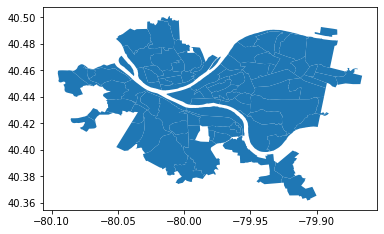

In [3]:
#Adding Shape File to better visualize data
neighborhoods = geopandas.read_file("Neighborhoods_.shx")
neighborhoods.plot()

In [15]:
hoods = pd.read_csv("Neighborhood.csv")
hoods = hoods[['hood','area','perimeter','intptlat10','intptlon10']]
hoods.head()

,hood,area,perimeter,intptlat10,intptlon10
0,Chateau,10688264.0,80995.806272,+40.4518148,-080.0280506
1,Summer Hill,12232021.0,80995.806272,+40.4922173,-080.0081121
2,Northview Heights,8739570.0,80995.806272,+40.4776383,-080.0025945
3,Spring Hill-City View,17550592.0,80995.806272,+40.4632158,-079.9941680
4,Perry South,25220622.0,80995.806272,+40.4733966,-080.0097343


In [11]:
crime_map = neighborhoods.merge(crime_data, how='left', left_on='hood', right_on='Neighborhood')
crime_map[['hood','Number of Incidents','intptlat10','intptlon10']].head()


,hood,Number of Incidents,intptlat10,intptlon10
0,Chateau,33.0,+40.4518148,-080.0280506
1,Summer Hill,2.0,+40.4922173,-080.0081121
2,Northview Heights,18.0,+40.4776383,-080.0025945
3,Spring Hill-City View,16.0,+40.4632158,-079.9941680
4,Perry South,50.0,+40.4733966,-080.0097343


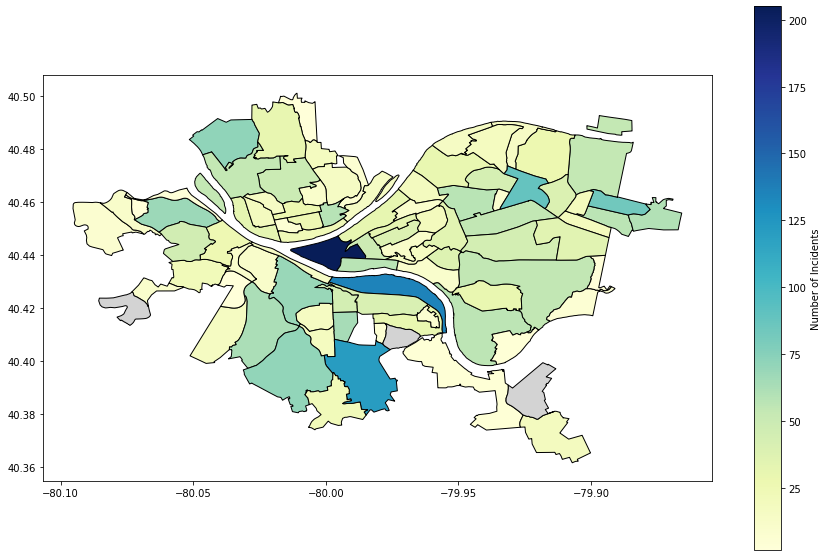

In [1]:
import geopandas
import pandas as pd
crimes = pd.read_csv("Pittsburgh Police Blotter (30 day).csv")
crime_data = crimes.groupby("Neighborhood").sum()['Number of Incidents']
crime_data.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods_.shx")
crime_map = neighborhoods.merge(crime_data, how='left', left_on='hood', right_on='Neighborhood')
crime_map.plot(column='Number of Incidents', # set the data to be used for coloring
               cmap='YlGnBu',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
# No data recorded for: St. Clair, East Carnegie, and New Homestead

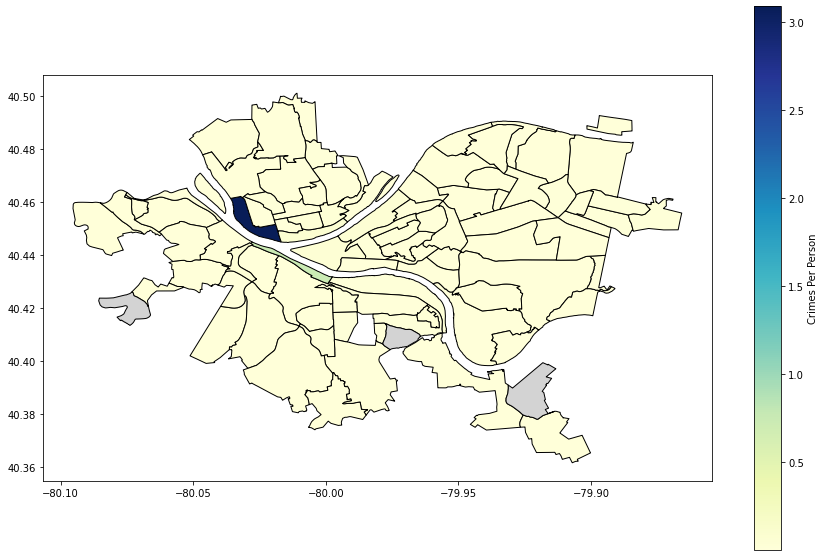

In [4]:
import geopandas
import pandas as pd
crimePop = pd.read_csv("CrimePopulation.csv")
crime_Pop = crimePop.groupby("Neighborhood").sum()['Crimes Per Person']
crime_Pop.sort_values(ascending=False)
crime_neighborhoods = geopandas.read_file("Neighborhoods_.shx")
crime_Pop_Map = crime_neighborhoods.merge(crime_Pop, how='left', left_on='hood', right_on='Neighborhood')
crime_Pop_Map.plot(column='Crimes Per Person', # set the data to be used for coloring
               cmap='YlGnBu',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Crimes Per Person"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
# No data recorded for: St. Clair, East Carnegie, and New Homestead

# Because the numbers for crimes per population were so small and the range was so wide, there was no really accurate way to represent the data in a visual show the neighborhood that was the best. So a simple table will have to do.

In [23]:
crime_Pop = crimePop.groupby("Crimes Per Person")['Neighborhood'].sum()
crime_Pop.sort_values(ascending=False)
crime_Pop.head(90)

Crimes Per Person
0.001903                  Summer Hill
0.002155                Regent Square
0.003317                North Oakland
0.003368                South Oakland
0.003640          Squirrel Hill South
                      ...            
0.051948               Strip District
0.056489    Central Business District
0.075908                  North Shore
0.736842                  South Shore
3.090900                      Chateau
Name: Neighborhood, Length: 86, dtype: object

# Summer Hill is the winner of this submetric!